# E-commerce Data Analysis

##### <i> Problem Statement: analyze the eCommerce dataset to extract meaningful insights and create a compelling narrative around their findings.


## 1. About The Data:

<ul style="line-height:30px;">
    <li>Dataset Source: <a href="https://www.kaggle.com/datasets/bytadit/ecommerce-order-dataset">Kaggle E-commerce Order Dataset</a></li>
    <li> multiple files store data. Each file and its respective columns are described below:</li>    
    <li><b>df_Customers.csv</b>: This file provides customer details.
        <ol>
            <li><b>customer_id</b>: Unique identifier for a customer, serving as the primary key.</li>
            <li><b>customer_zip_code_prefix</b>: Customer's zip code.</li>
            <li><b>customer_city</b>: Customer's city.</li>
            <li><b>customer_state</b>: Customer's state.</li>
        </ol>
    </li>
    <li><b>df_Orders.csv</b>: This file provides order details.
        <ol>
            <li><b>order_id</b>: Unique identifier for an order, serving as the primary key.</li>
            <li><b>customer_id</b>: Unique identifier for a customer. This may not be unique in this table.</li>
            <li><b>order_status</b>: The status of the order (e.g., delivered, canceled, processing).</li>
            <li><b>order_purchase_timestamp</b>: Timestamp when the order was placed by the customer.</li>
            <li><b>order_approved_at</b>: Timestamp when the order was approved by the seller.</li>
            <li><b>order_delivered_timestamp</b>: Timestamp when the order was delivered to the customer.</li>
            <li><b>order_estimated_delivery_date</b>: Estimated delivery date provided to the customer at the time of order.</li>
        </ol>
    </li>
    <li><b>df_OrderItems.csv</b>: This file provides details of the items in each order.
        <ol>
            <li><b>order_id</b>: Unique identifier for an order.</li>
            <li><b>order_item_id</b>: Item number within each order, part of the primary key along with <b>order_id</b>.</li>
            <li><b>product_id</b>: Unique identifier for a product.</li>
            <li><b>seller_id</b>: Unique identifier for the seller.</li>
            <li><b>price</b>: Selling price of the product.</li>
            <li><b>shipping_charges</b>: Shipping cost for the product.</li>
        </ol>
    </li>
    <li><b>df_Payments.csv</b>: This file provides payment details.
        <ol>
            <li><b>order_id</b>: Unique identifier for an order.</li>
            <li><b>payment_sequential</b>: Sequence number of the payment for the order.</li>
            <li><b>payment_type</b>: Type of payment (e.g., credit card, debit card).</li>
            <li><b>payment_installments</b>: Number of installments for the payment (if applicable).</li>
            <li><b>payment_value</b>: The transaction amount.</li>
        </ol>
    </li>
    <li><b>df_Products.csv</b>: This file provides product details.
        <ol>
            <li><b>product_id</b>: Unique identifier for each product, serving as the primary key.</li>
            <li><b>product_category_name</b>: The category to which the product belongs.</li>
            <li><b>product_weight_g</b>: Product weight in grams.</li>
            <li><b>product_length_cm</b>: Product length in centimeters.</li>
            <li><b>product_height_cm</b>: Product height in centimeters.</li>
            <li><b>product_width_cm</b>: Product width in centimeters.</li>
        </ol>
    </li>
</ul>

## 2. Learn The Data

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# load the data:
customers = pd.read_csv('df_Customers.csv')
order_items = pd.read_csv('df_OrderItems.csv')
orders = pd.read_csv('df_Orders.csv')
payments = pd.read_csv('df_Payments.csv')
products = pd.read_csv('df_Products.csv')

In [3]:
# check top 5 data for all data frame
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [5]:
order_items.head()


,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


In [7]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


In [8]:
#There is multiple dataFrame for order details, so we can merge into single dataframe because 4 dataframe have just ORDER details for other order data.

# We are going to merge. order dataframe with order_items, customers and payments Data frame

order_detailsdata = orders.merge(order_items, on="order_id").merge(payments, on="order_id").merge(customers, on="customer_id")
order_detailsdata.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,58125,varzea paulista,SP
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,3112,armacao dos buzios,RJ
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,4119,jandira,SP
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,18212,uberlandia,MG
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,88868,ilhabela,SP


In [9]:
#########  So now we have to work with only 2 Dataframe
# order_detailsdata  & products
orders.shape

(89316, 7)

In [10]:
order_detailsdata.shape

(89316, 18)

In [11]:
# Remove unwanted column
#1. on order details dataframe
# # # We can remove :

# 1. order_approved_at
# 2. order_estimated_delivery_date
# 3. seller_id
# 4. payment_sequential
# 5. payment_type
# 6. payment_installments

order_detailsdata = order_detailsdata.drop(['order_approved_at','order_estimated_delivery_date','seller_id','payment_sequential','payment_type','payment_installments','order_delivered_timestamp'], axis=1)
order_detailsdata.head()

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,90K0C1fIyQUf,223.51,84.65,259.14,58125,varzea paulista,SP
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,qejhpMGGVcsl,170.80,23.79,382.39,3112,armacao dos buzios,RJ
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,qUS5d2pEAyxJ,64.40,17.38,249.25,4119,jandira,SP
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,639iGvMyv0De,264.50,30.72,27.79,18212,uberlandia,MG
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,1lycYGcsic2F,779.90,30.66,76.15,88868,ilhabela,SP


In [12]:
#1. on products details dataframe
# # # We can remove : 	product_weight_g	product_length_cm	product_height_cm	product_width_cm

products = products.drop(['product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis=1)

In [13]:
products.head()

,product_id,product_category_name
0,90K0C1fIyQUf,toys
1,qejhpMGGVcsl,watches_gifts
2,qUS5d2pEAyxJ,costruction_tools_garden
3,639iGvMyv0De,toys
4,1lycYGcsic2F,toys


In [14]:
#check for null values
order_detailsdata.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
product_id                  0
price                       0
shipping_charges            0
payment_value               0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
products.isnull().sum()

product_id                 0
product_category_name    308
dtype: int64

In [16]:
products['product_category_name']  = products['product_category_name'].fillna('Uncategories',axis=0)

In [17]:
products.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [18]:
#check for data type
order_detailsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  89316 non-null  object 
 1   customer_id               89316 non-null  object 
 2   order_status              89316 non-null  object 
 3   order_purchase_timestamp  89316 non-null  object 
 4   product_id                89316 non-null  object 
 5   price                     89316 non-null  float64
 6   shipping_charges          89316 non-null  float64
 7   payment_value             89316 non-null  float64
 8   customer_zip_code_prefix  89316 non-null  int64  
 9   customer_city             89316 non-null  object 
 10  customer_state            89316 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.5+ MB


In [19]:
#order_status - we can convert to string.
order_detailsdata['order_status'] = order_detailsdata['order_status'].astype(str)

In [20]:
# order_purchase_timestamp  can convert to datetime formate
order_detailsdata['order_purchase_timestamp'] = pd.to_datetime(order_detailsdata['order_purchase_timestamp'])

In [21]:
# create a new column for the total price
order_detailsdata['total'] = order_detailsdata['price'] + order_detailsdata['shipping_charges']

<p><b>1. Overall Sales Performance</b>

* What are the overall sales trends over time (daily, weekly, or monthly)?
* How do the total sales figures vary across different periods (e.g., month-to-month, year-to-year)?
</p>

In [22]:
# Daily Sales

daiy_sales = order_detailsdata.resample('D', on="order_purchase_timestamp").sum()['total']
daiy_sales

order_purchase_timestamp
2016-09-04    966.01
2016-09-05    159.63
2016-09-06      0.00
2016-09-07      0.00
2016-09-08      0.00
               ...  
2018-08-30      0.00
2018-08-31      0.00
2018-09-01      0.00
2018-09-02      0.00
2018-09-03    235.74
Freq: D, Name: total, Length: 730, dtype: float64

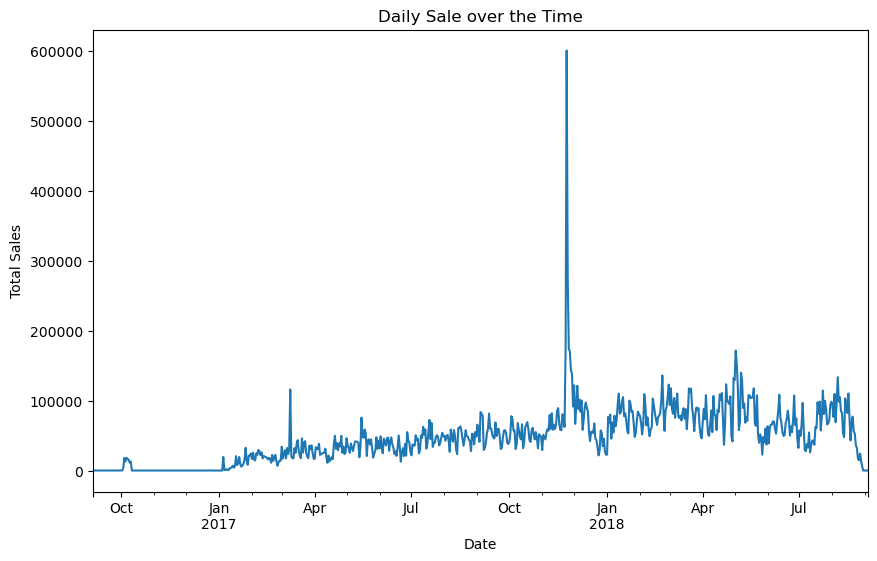

In [23]:
# plot with line chart
plt.figure(figsize=(10,6))
daiy_sales.plot(kind='line')
plt.title('Daily Sale over the Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [24]:
# Weekly Sales

weekly_sales = order_detailsdata.resample('W', on="order_purchase_timestamp").sum()['total']
weekly_sales

order_purchase_timestamp
2016-09-04       966.01
2016-09-11       159.63
2016-09-18         0.00
2016-09-25         0.00
2016-10-02        51.98
                ...    
2018-08-12    604728.63
2018-08-19    575624.97
2018-08-26    285677.58
2018-09-02     43143.51
2018-09-09       235.74
Freq: W-SUN, Name: total, Length: 106, dtype: float64

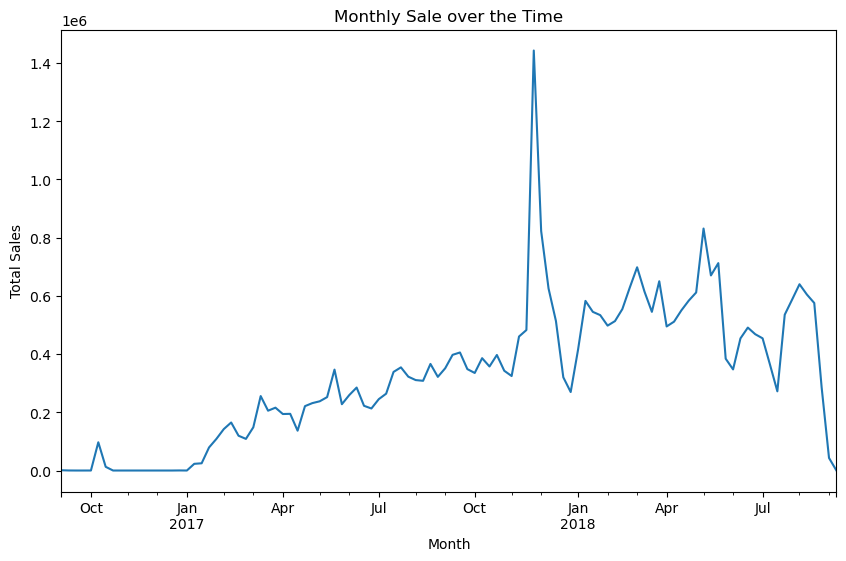

In [25]:
# weekly
plt.figure(figsize=(10,6))
weekly_sales.plot(kind="line")
plt.title('Monthly Sale over the Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [26]:
# Monthly Sales

monthly_sales = order_detailsdata.resample('M', on="order_purchase_timestamp").sum()['total']
monthly_sales
plt.show()

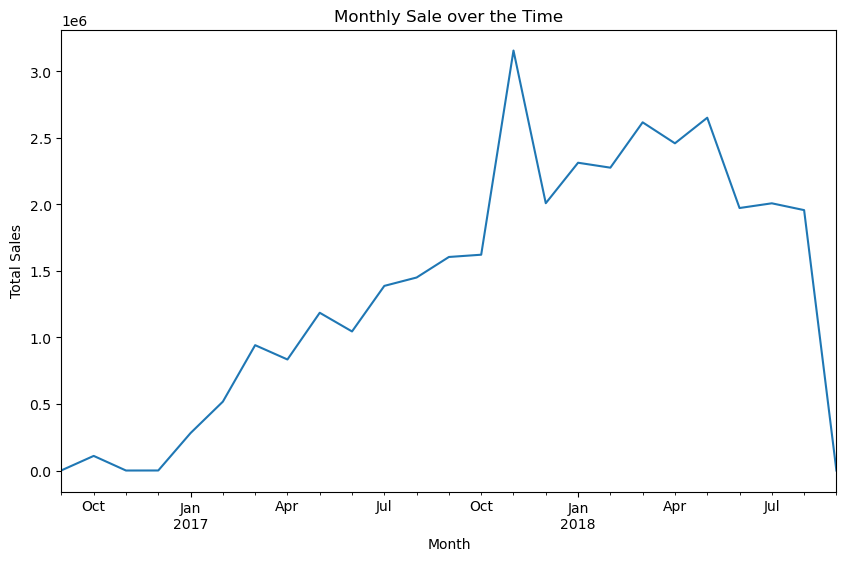

In [27]:
plt.figure(figsize=(10,6))
monthly_sales.plot(kind="line")
plt.title('Monthly Sale over the Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [28]:
# Analyze Sales by Month Across Multiple Years:
order_detailsdata['year'] = order_detailsdata['order_purchase_timestamp'].dt.year
order_detailsdata ['month'] = order_detailsdata['order_purchase_timestamp'].dt.month

order_detailsdata = order_detailsdata.sort_values(by='month')

month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
#order_detailsdata['month'] = order_detailsdata['month'].map(month_mapping)

#order_detailsdata

In [29]:
monthly_sales_by_year = order_detailsdata.groupby(['year', 'month'])['total'].sum().unstack()
monthly_sales_by_year.rename(columns=month_mapping, inplace=True)
monthly_sales_by_year

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1125.64,109840.01,NaN,277.26
2017,281577.74,517698.87,942034.30,834530.47,1185649.97,1045162.92,1387588.24,1450569.89,1604889.14,1621871.22,3156467.19,2008941.70
2018,2313116.76,2276044.40,2616873.69,2459057.79,2651374.08,1972822.19,2008237.28,1957085.57,235.74,NaN,NaN,NaN


In [30]:
print(order_detailsdata.dtypes)

order_id                            object
customer_id                         object
order_status                        object
order_purchase_timestamp    datetime64[ns]
product_id                          object
price                              float64
shipping_charges                   float64
payment_value                      float64
customer_zip_code_prefix             int64
customer_city                       object
customer_state                      object
total                              float64
year                                 int32
month                                int32
dtype: object


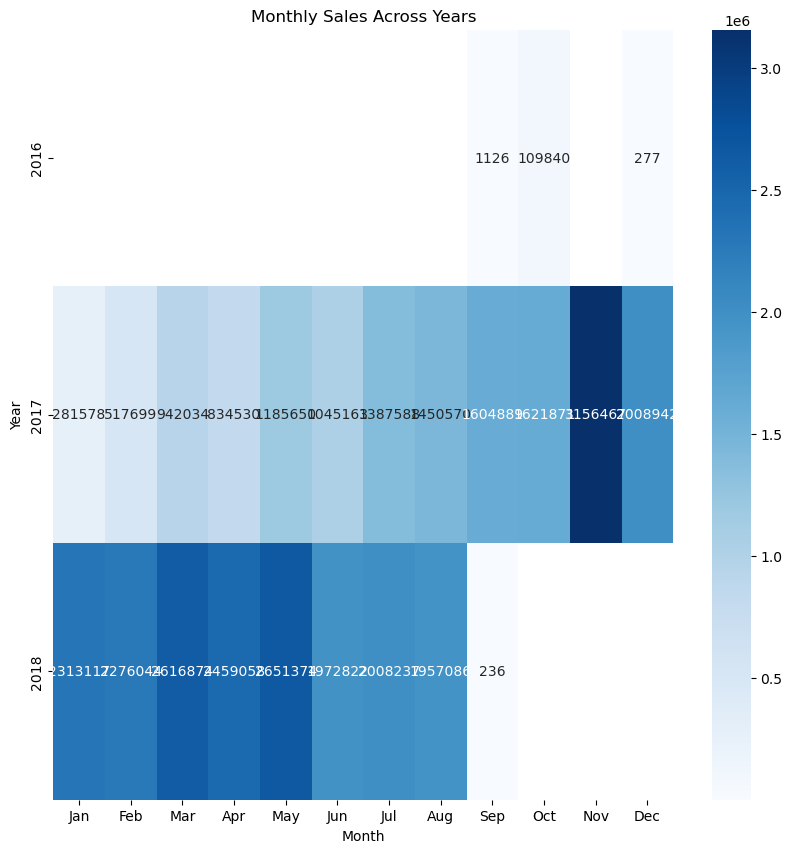

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(monthly_sales_by_year, cmap='Blues', annot=True, fmt=".0f")
plt.title('Monthly Sales Across Years')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

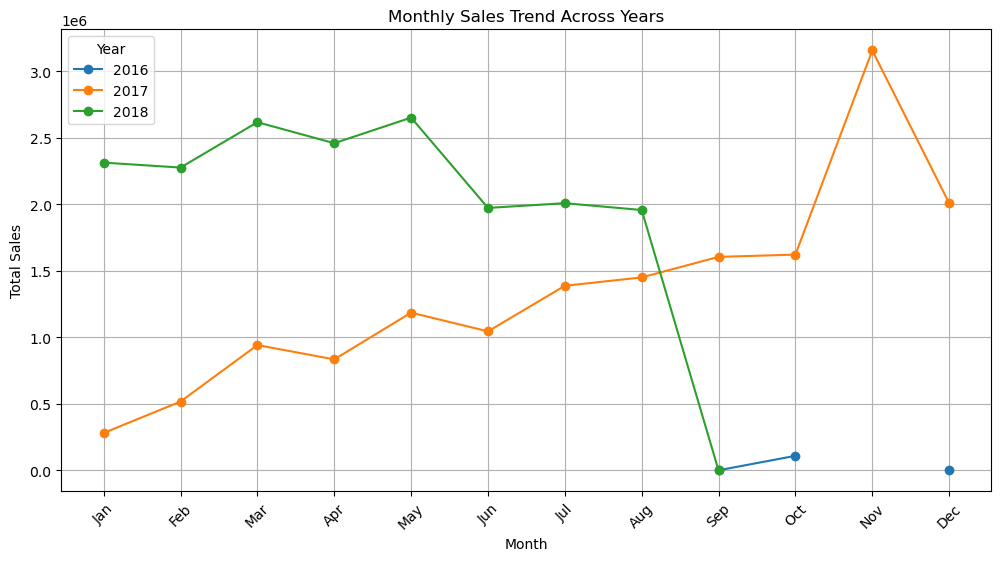

In [32]:
plt.figure(figsize=(12, 6))
for year in monthly_sales_by_year.index:
    plt.plot(monthly_sales_by_year.columns, monthly_sales_by_year.loc[year], marker='o', label=year)

plt.title('Monthly Sales Trend Across Years')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(monthly_sales_by_year.columns, rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

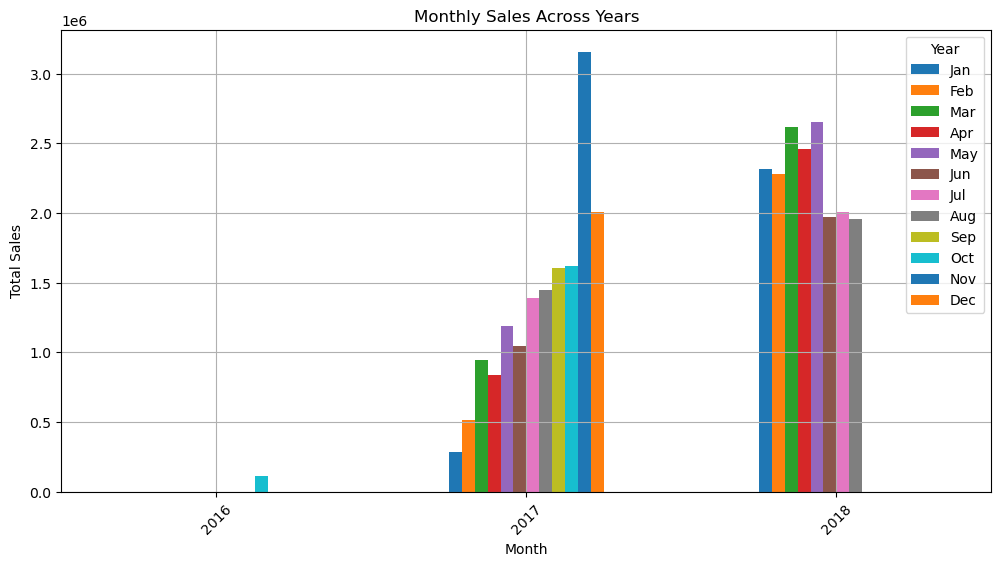

In [33]:
monthly_sales_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Sales Across Years')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

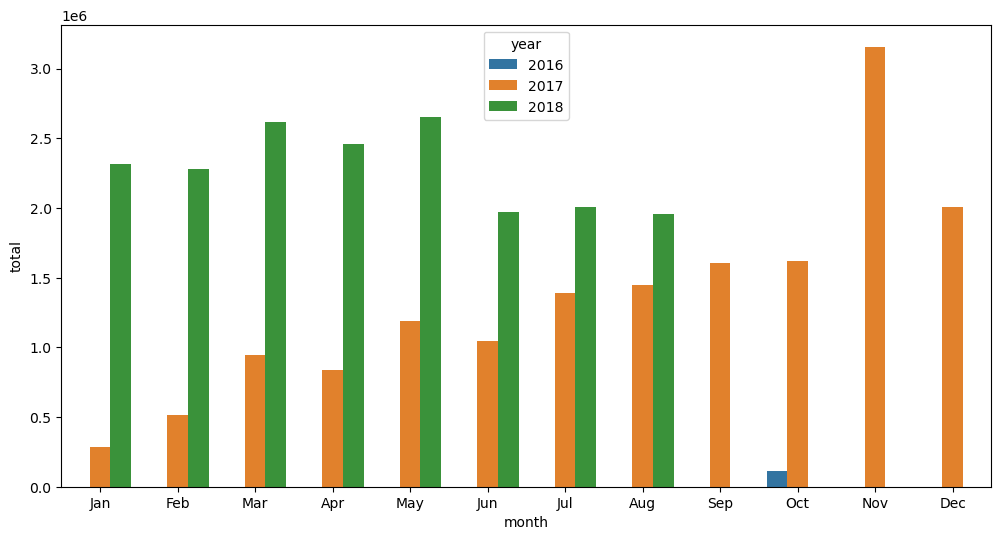

In [34]:
df_reset = monthly_sales_by_year.reset_index()

# Melt the data to have a long format
df_melted = pd.melt(df_reset, id_vars=['year'], var_name='month', value_name='total')
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total', hue='year', data=df_melted)
plt.show()

## 2. Customer Insights

* What are the characteristics of the top customers in terms of total spending?



In [35]:
order_detailsdata.head()

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month
67577,COpvLG6bUFqY,LBij5JMI6VO2,delivered,2018-01-27 21:39:41,5vt0KevHX6i8,1899.00,26.71,776.84,45534,joacaba,SC,1925.71,2018,1
26376,CFHmvB9wEp2l,bIq7qfCR4bkA,delivered,2018-01-31 18:40:48,tfK6N5cTAvez,518.18,47.55,450.42,45823,imbituba,SC,565.73,2018,1
26373,EBaBOGNMADAn,lZ0VoCvuGvDm,delivered,2018-01-02 15:47:32,QCAiaLSyGTa2,84.94,27.54,4.84,59815,sao paulo,SP,112.48,2018,1
64340,DsxA4wA3UU1V,MIEUxjTGyH7i,delivered,2018-01-09 15:38:54,3H7nJ3Wp12et,65.60,47.54,588.06,6455,osasco,SP,113.14,2018,1
26364,ktYzujgJlxrk,0cuxNoYDplX9,delivered,2018-01-18 13:21:36,eX2JZe7P5zHr,12.35,58.51,163.42,31844,rio de janeiro,RJ,70.86,2018,1


1. top 10 customer by spending
2. filter by location "According to our survey SP city customer are on TOP 10  purchaser list"
3. filter by category "top category is from Garden tools and rest 9 customers are buying Toys "
4. Number of time order "All customer Id are unique in the order table"

In [36]:
order_detailsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89316 entries, 67577 to 29240
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  89316 non-null  object        
 1   customer_id               89316 non-null  object        
 2   order_status              89316 non-null  object        
 3   order_purchase_timestamp  89316 non-null  datetime64[ns]
 4   product_id                89316 non-null  object        
 5   price                     89316 non-null  float64       
 6   shipping_charges          89316 non-null  float64       
 7   payment_value             89316 non-null  float64       
 8   customer_zip_code_prefix  89316 non-null  int64         
 9   customer_city             89316 non-null  object        
 10  customer_state            89316 non-null  object        
 11  total                     89316 non-null  float64       
 12  year               

* How do order frequencies differ among various customer segments (e.g., new vs. returning customers)?
Their are no duplicate customer so all customer are new we can't plot any graph between new and returning customer.

In [37]:
order_detailsdata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 89316 entries, 67577 to 29240
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  89316 non-null  object        
 1   customer_id               89316 non-null  object        
 2   order_status              89316 non-null  object        
 3   order_purchase_timestamp  89316 non-null  datetime64[ns]
 4   product_id                89316 non-null  object        
 5   price                     89316 non-null  float64       
 6   shipping_charges          89316 non-null  float64       
 7   payment_value             89316 non-null  float64       
 8   customer_zip_code_prefix  89316 non-null  int64         
 9   customer_city             89316 non-null  object        
 10  customer_state            89316 non-null  object        
 11  total                     89316 non-null  float64       
 12  year               

In [38]:
order_detailsdata[order_detailsdata.duplicated(subset='customer_id', keep='first')]

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month


In [39]:
order_detailsdata

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month
67577,COpvLG6bUFqY,LBij5JMI6VO2,delivered,2018-01-27 21:39:41,5vt0KevHX6i8,1899.00,26.71,776.84,45534,joacaba,SC,1925.71,2018,1
26376,CFHmvB9wEp2l,bIq7qfCR4bkA,delivered,2018-01-31 18:40:48,tfK6N5cTAvez,518.18,47.55,450.42,45823,imbituba,SC,565.73,2018,1
26373,EBaBOGNMADAn,lZ0VoCvuGvDm,delivered,2018-01-02 15:47:32,QCAiaLSyGTa2,84.94,27.54,4.84,59815,sao paulo,SP,112.48,2018,1
64340,DsxA4wA3UU1V,MIEUxjTGyH7i,delivered,2018-01-09 15:38:54,3H7nJ3Wp12et,65.60,47.54,588.06,6455,osasco,SP,113.14,2018,1
26364,ktYzujgJlxrk,0cuxNoYDplX9,delivered,2018-01-18 13:21:36,eX2JZe7P5zHr,12.35,58.51,163.42,31844,rio de janeiro,RJ,70.86,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26930,xCLNgQXzccLC,JOLJ6jrveIQ7,delivered,2017-12-05 10:40:02,GvBzGCvvIC2D,777.00,154.56,331.96,8111,salvador,BA,931.56,2017,12
52917,tJpC1b1XJdfM,KWLqULGvbJ8B,delivered,2017-12-02 08:50:05,ADFzB896wqrB,76.99,92.85,407.05,88870,sao paulo,SP,169.84,2017,12
3834,EaHHnSxxVkbq,6cbC7XPYBZcY,delivered,2017-12-13 15:32:35,oX8dgtFlR8Vj,102.80,65.24,220.08,94040,sao paulo,SP,168.04,2017,12
52918,cYD9lkp0fZl7,qtwSsEdbWk8g,delivered,2017-12-14 12:24:24,279imppa3ufZ,128.99,24.23,52.56,88865,campinas,SP,153.22,2017,12


In [40]:
order_details=order_detailsdata['customer_id'].value_counts()
order_details

customer_id
LBij5JMI6VO2    1
QmOsVkbR2oC9    1
inWYzs7CvcrI    1
sX5cOuPjqxbm    1
dQfQvMEMh6xa    1
               ..
F3PgnUePJ1Xu    1
Ln0kavxmP7mf    1
9X9cUFkYHnGx    1
nDRT1kOTRFLJ    1
lTBcEMTPRqzr    1
Name: count, Length: 89316, dtype: int64

#customer_counts = order_detailsdata['customer_id'].value_counts()
#customer_counts[customer_counts > 1]

3. Product Analysis

* Which products are the best-sellers and which have the highest revenue?
product_id 
* Are there any seasonal patterns or trends in the sales of specific products?


In [41]:
product_counts = order_detailsdata['product_id'].value_counts().head(1)
product_counts

product_id
0vbEvli2JYJu    405
Name: count, dtype: int64

In [42]:
product_revenue=order_detailsdata.groupby(['product_id'])['total'].sum().sort_values(ascending=False).head()
product_revenue
product_revenue=pd.DataFrame(product_revenue)

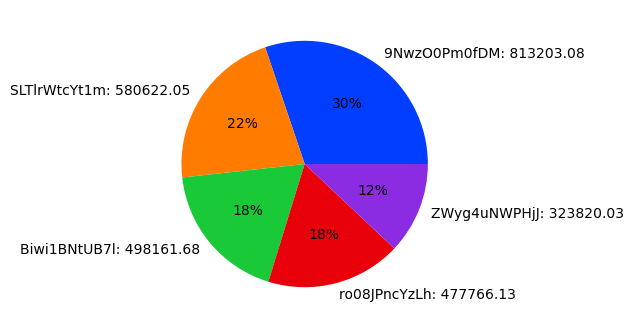

In [43]:
plt.figure(figsize=(4,4))
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
# plotting data on chart 
labels = [f'{product}: {value}' for product, value in zip(product_revenue.index, product_revenue['total'])]
plt.pie(product_revenue['total'], labels=labels, colors=palette_color, autopct='%.0f%%') 
plt.show()

In [44]:
order_detailsdata.info()
#Are there any seasonal patterns or trends in the sales of specific products?

<class 'pandas.core.frame.DataFrame'>
Index: 89316 entries, 67577 to 29240
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  89316 non-null  object        
 1   customer_id               89316 non-null  object        
 2   order_status              89316 non-null  object        
 3   order_purchase_timestamp  89316 non-null  datetime64[ns]
 4   product_id                89316 non-null  object        
 5   price                     89316 non-null  float64       
 6   shipping_charges          89316 non-null  float64       
 7   payment_value             89316 non-null  float64       
 8   customer_zip_code_prefix  89316 non-null  int64         
 9   customer_city             89316 non-null  object        
 10  customer_state            89316 non-null  object        
 11  total                     89316 non-null  float64       
 12  year               

In [45]:
order_detailsdata['month'].value_counts()

month
8     9583
5     9570
7     9211
3     8900
6     8463
4     8356
2     7603
1     7320
11    6840
12    4982
10    4547
9     3941
Name: count, dtype: int64

In [46]:
month_label=['winter','summer','rainy']
bin_month=[0,4,8,12]
order_detailsdata['season_category']=pd.cut(order_detailsdata['month'],bin_month,labels=month_label)
#cars['Cars_Category'] = pd.cut(cars_2['Price_y'],bins, right=False, labels=label)
order_detailsdata.head()


,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month,season_category
67577,COpvLG6bUFqY,LBij5JMI6VO2,delivered,2018-01-27 21:39:41,5vt0KevHX6i8,1899.00,26.71,776.84,45534,joacaba,SC,1925.71,2018,1,winter
26376,CFHmvB9wEp2l,bIq7qfCR4bkA,delivered,2018-01-31 18:40:48,tfK6N5cTAvez,518.18,47.55,450.42,45823,imbituba,SC,565.73,2018,1,winter
26373,EBaBOGNMADAn,lZ0VoCvuGvDm,delivered,2018-01-02 15:47:32,QCAiaLSyGTa2,84.94,27.54,4.84,59815,sao paulo,SP,112.48,2018,1,winter
64340,DsxA4wA3UU1V,MIEUxjTGyH7i,delivered,2018-01-09 15:38:54,3H7nJ3Wp12et,65.60,47.54,588.06,6455,osasco,SP,113.14,2018,1,winter
26364,ktYzujgJlxrk,0cuxNoYDplX9,delivered,2018-01-18 13:21:36,eX2JZe7P5zHr,12.35,58.51,163.42,31844,rio de janeiro,RJ,70.86,2018,1,winter


In [47]:
order_detailsdata[order_detailsdata['product_id']=='Biwi1BNtUB7l']

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month,season_category
82281,23JXw7PrsQ1M,iNfc4z1idZYZ,delivered,2018-01-06 18:03:07,Biwi1BNtUB7l,509.99,17.44,1221.39,30180,barra mansa,RJ,527.43,2018,1,winter
25508,LUnFNJzFwdqh,DcPUUOtSZ8K9,delivered,2018-01-28 19:26:06,Biwi1BNtUB7l,509.99,17.38,125.80,74223,sao paulo,SP,527.37,2018,1,winter
58839,Eh64OI7DZ29E,DvPs4KjAbVOP,delivered,2018-01-17 16:13:03,Biwi1BNtUB7l,509.99,17.44,1221.39,26087,nova iguacu,RJ,527.43,2018,1,winter
32524,YOeLFJVv2lXc,2053nXsfLI8e,delivered,2018-01-22 22:34:41,Biwi1BNtUB7l,509.99,17.38,165.25,88735,sao caetano do sul,SP,527.37,2018,1,winter
32582,Peg40nICM6c8,eRpYP2jRZaa6,delivered,2018-01-23 17:32:55,Biwi1BNtUB7l,509.99,17.44,257.45,78076,belmonte,SC,527.43,2018,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37729,F4lyQpT3vS7I,lrX2l4QyvqJQ,delivered,2017-12-06 18:34:22,Biwi1BNtUB7l,2130.00,14.01,698.10,25530,pirassununga,SP,2144.01,2017,12,rainy
22764,j0Hb53AN9SWp,Rk31tKEwoSjw,delivered,2017-12-05 09:51:41,Biwi1BNtUB7l,2130.00,14.01,698.10,69055,sorocaba,SP,2144.01,2017,12,rainy
63694,7nWi3e7jGZMM,1Wj8ixLJOeaZ,delivered,2017-12-29 21:00:37,Biwi1BNtUB7l,509.99,90.98,385.30,44255,sao mateus do sul,PR,600.97,2017,12,rainy
85757,xiSgqNiNi09D,YOXLcW3FPP5X,delivered,2017-12-27 11:59:15,Biwi1BNtUB7l,509.99,21.76,97.19,63595,maracanau,CE,531.75,2017,12,rainy


In [48]:
season_group=order_detailsdata.groupby(['season_category','product_id'])['order_id'].count().sort_values(ascending=False)
season_group=season_group[season_group>0]
top_10_season_data=season_group.head(10)
top_10_season_data


season_category  product_id  
winter           UgkSjxoiV9Ev    219
summer           0vbEvli2JYJu    219
rainy            9NwzO0Pm0fDM    174
winter           Ffe8gTdmyO3U    138
rainy            SLTlrWtcYt1m    130
                 Biwi1BNtUB7l    128
summer           1edaUIVffPFF    125
winter           sCONCvmO1cEY    124
rainy            ro08JPncYzLh    123
summer           h2L3kgHs7Aaa    120
Name: order_id, dtype: int64

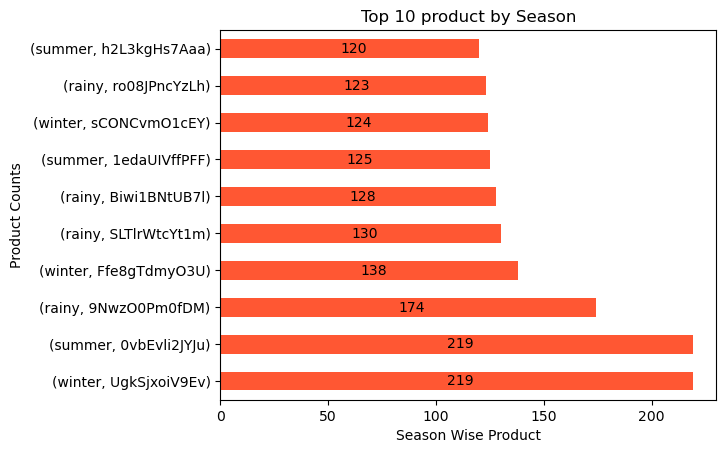

In [49]:
top_10_season_data.plot(kind='barh', color='#FF5733')
plt.title("Top 10 product by Season")
plt.xlabel("Season Wise Product")
plt.ylabel("Product Counts")
plt.bar_label(plt.gca().containers[0], labels=top_10_season_data, padding=3, label_type='center')
plt.show()

4. Sales by Region

* How do sales figures differ across various regions or countries?
* Are there any regional patterns or trends in product popularity or customer purchasing behavior?

<Axes: xlabel='customer_state', ylabel='count'>

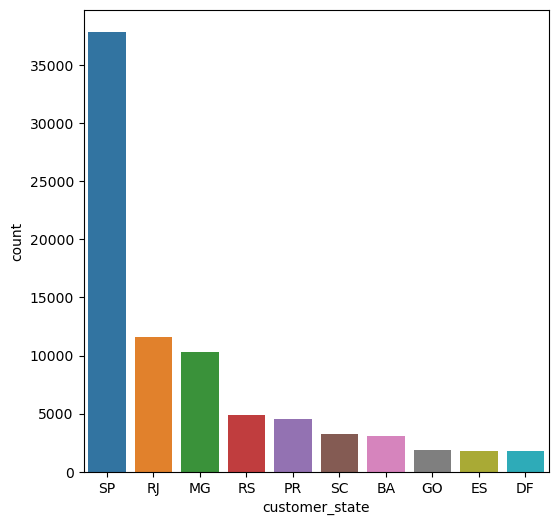

In [50]:
state_wise_data=pd.DataFrame(order_detailsdata['customer_state'].value_counts().head(10))
state_wise_data = state_wise_data.reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x= 'customer_state', y = 'count', data = state_wise_data)

In [51]:
state_wise_sales = order_detailsdata.groupby('customer_state')['total'].sum().sort_values(ascending=False).reset_index().head(15)

In [52]:
state_wise_sales 

,customer_state,total
0,SP,14586002.19
1,RJ,4347299.47
2,MG,3972702.51
3,RS,1884154.76
4,PR,1807890.25
5,SC,1210286.60
6,BA,1204627.99
7,GO,768086.19
8,ES,695583.59
9,DF,641402.17


<Axes: xlabel='customer_state', ylabel='total'>

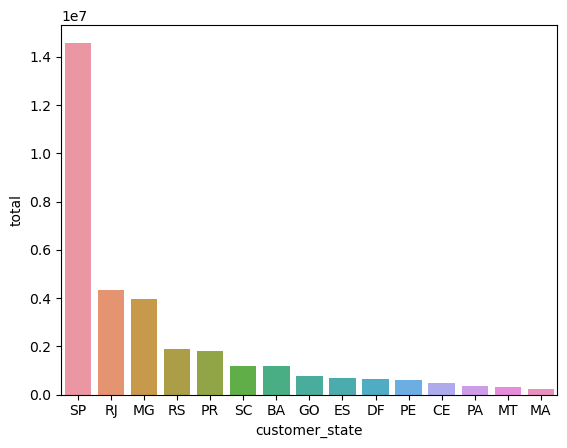

In [53]:
sns.barplot(x= 'customer_state', y = 'total', data = state_wise_sales)

In [54]:
regional_group=order_detailsdata.groupby(['product_id'])['order_id'].count().sort_values(ascending=False)
top_10_regional_data=regional_group.head(5)
top_10_regional_data
top_10_regional_data = top_10_regional_data.reset_index()

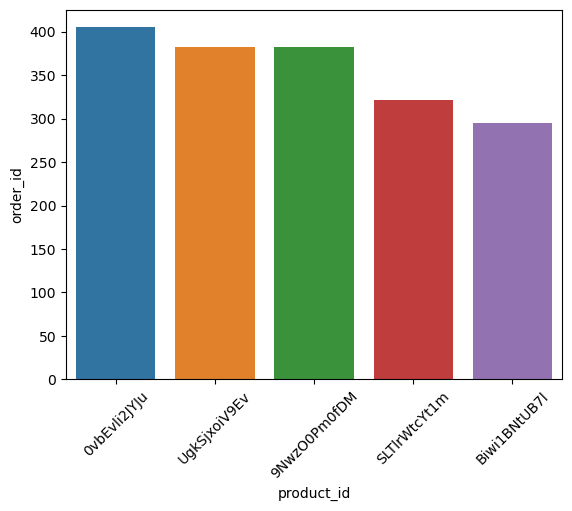

In [55]:
sns.barplot(x= 'product_id', y = 'order_id', data = top_10_regional_data)
plt.xticks(rotation = 45)
plt.show()

5. Order Size and Value

* What is the distribution of order sizes (e.g., number of items per order)?
* How does the average order value vary by customer segment or product category?

* What is the distribution of order sizes (e.g., number of items per order)?


In [56]:
New_order_detailsdata = order_detailsdata.merge(products, on = 'product_id', how = 'right')
New_order_detailsdata.head()

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month,season_category,product_category_name
0,GxVWKhDsAFA0,w6oZ2O8zMIXV,delivered,2017-10-25 01:02:19,90K0C1fIyQUf,223.51,27.20,187.06,2253,caldas novas,GO,250.71,2017,10,rainy,toys
1,yerr73FjzQBV,TuHMZO7ZH7mZ,delivered,2017-10-23 17:07:40,90K0C1fIyQUf,223.51,48.35,294.17,17515,rio de janeiro,RJ,271.86,2017,10,rainy,toys
2,gqG6NXbf38pt,zhhv7javni5Y,delivered,2017-10-29 20:49:54,90K0C1fIyQUf,223.51,27.20,187.06,5707,conselheiro lafaiete,MG,250.71,2017,10,rainy,toys
3,HAMsBcLy9HjK,UNYaurBkHxer,delivered,2017-10-29 11:01:06,90K0C1fIyQUf,223.51,84.65,259.14,40286,aracatuba,SP,308.16,2017,10,rainy,toys
4,GxnIw0TWGbsl,olvLB3sqg4YE,delivered,2017-10-23 16:26:56,90K0C1fIyQUf,223.51,84.65,259.14,88130,araraquara,SP,308.16,2017,10,rainy,toys


In [57]:
merged_df = pd.merge(products, order_detailsdata, on='product_id')

In [58]:
merged_df.shape

(2529486, 16)

In [59]:
New_sales_df = merged_df.drop_duplicates(subset='order_id', keep='first')
New_sales_df.shape

(89316, 16)

In [60]:
New_sales=New_sales_df.groupby('product_category_name')['payment_value'].mean().sort_values(ascending=False).reset_index().head(10)

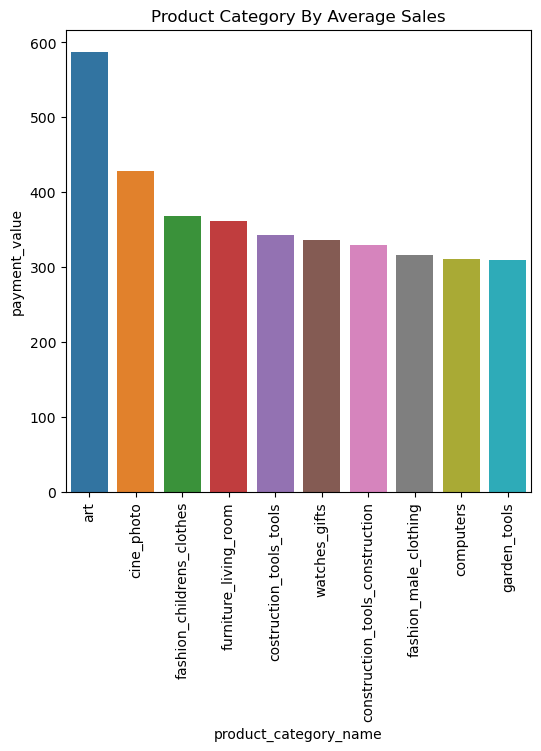

In [61]:
plt.figure(figsize=(6,6))
sns.barplot(x= 'product_category_name', y = 'payment_value', data = New_sales)
plt.xticks(rotation = 90)
plt.title("Product Category By Average Sales")
plt.show()

6. Time Analysis

* What are the peak hours or days for order placements?
* Are there specific times of the year (e.g., holidays) that show significant changes in sales volume?

In [62]:
order_detailsdata.head()

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month,season_category
67577,COpvLG6bUFqY,LBij5JMI6VO2,delivered,2018-01-27 21:39:41,5vt0KevHX6i8,1899.00,26.71,776.84,45534,joacaba,SC,1925.71,2018,1,winter
26376,CFHmvB9wEp2l,bIq7qfCR4bkA,delivered,2018-01-31 18:40:48,tfK6N5cTAvez,518.18,47.55,450.42,45823,imbituba,SC,565.73,2018,1,winter
26373,EBaBOGNMADAn,lZ0VoCvuGvDm,delivered,2018-01-02 15:47:32,QCAiaLSyGTa2,84.94,27.54,4.84,59815,sao paulo,SP,112.48,2018,1,winter
64340,DsxA4wA3UU1V,MIEUxjTGyH7i,delivered,2018-01-09 15:38:54,3H7nJ3Wp12et,65.60,47.54,588.06,6455,osasco,SP,113.14,2018,1,winter
26364,ktYzujgJlxrk,0cuxNoYDplX9,delivered,2018-01-18 13:21:36,eX2JZe7P5zHr,12.35,58.51,163.42,31844,rio de janeiro,RJ,70.86,2018,1,winter


In [63]:
order_detailsdata['hours']=order_detailsdata['order_purchase_timestamp'].dt.hour
order_detailsdata

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,shipping_charges,payment_value,customer_zip_code_prefix,customer_city,customer_state,total,year,month,season_category,hours
67577,COpvLG6bUFqY,LBij5JMI6VO2,delivered,2018-01-27 21:39:41,5vt0KevHX6i8,1899.00,26.71,776.84,45534,joacaba,SC,1925.71,2018,1,winter,21
26376,CFHmvB9wEp2l,bIq7qfCR4bkA,delivered,2018-01-31 18:40:48,tfK6N5cTAvez,518.18,47.55,450.42,45823,imbituba,SC,565.73,2018,1,winter,18
26373,EBaBOGNMADAn,lZ0VoCvuGvDm,delivered,2018-01-02 15:47:32,QCAiaLSyGTa2,84.94,27.54,4.84,59815,sao paulo,SP,112.48,2018,1,winter,15
64340,DsxA4wA3UU1V,MIEUxjTGyH7i,delivered,2018-01-09 15:38:54,3H7nJ3Wp12et,65.60,47.54,588.06,6455,osasco,SP,113.14,2018,1,winter,15
26364,ktYzujgJlxrk,0cuxNoYDplX9,delivered,2018-01-18 13:21:36,eX2JZe7P5zHr,12.35,58.51,163.42,31844,rio de janeiro,RJ,70.86,2018,1,winter,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26930,xCLNgQXzccLC,JOLJ6jrveIQ7,delivered,2017-12-05 10:40:02,GvBzGCvvIC2D,777.00,154.56,331.96,8111,salvador,BA,931.56,2017,12,rainy,10
52917,tJpC1b1XJdfM,KWLqULGvbJ8B,delivered,2017-12-02 08:50:05,ADFzB896wqrB,76.99,92.85,407.05,88870,sao paulo,SP,169.84,2017,12,rainy,8
3834,EaHHnSxxVkbq,6cbC7XPYBZcY,delivered,2017-12-13 15:32:35,oX8dgtFlR8Vj,102.80,65.24,220.08,94040,sao paulo,SP,168.04,2017,12,rainy,15
52918,cYD9lkp0fZl7,qtwSsEdbWk8g,delivered,2017-12-14 12:24:24,279imppa3ufZ,128.99,24.23,52.56,88865,campinas,SP,153.22,2017,12,rainy,12


In [64]:
hour_wise_order_detailsdata=order_detailsdata.groupby('hours')['order_id'].count().sort_index()
hour_wise_order_detailsdata


hours
0     2199
1      999
2      471
3      249
4      215
5      180
6      486
7     1113
8     2732
9     4387
10    5611
11    5865
12    5395
13    5722
14    6052
15    5740
16    5978
17    5428
18    5264
19    5276
20    5525
21    5457
22    5257
23    3715
Name: order_id, dtype: int64

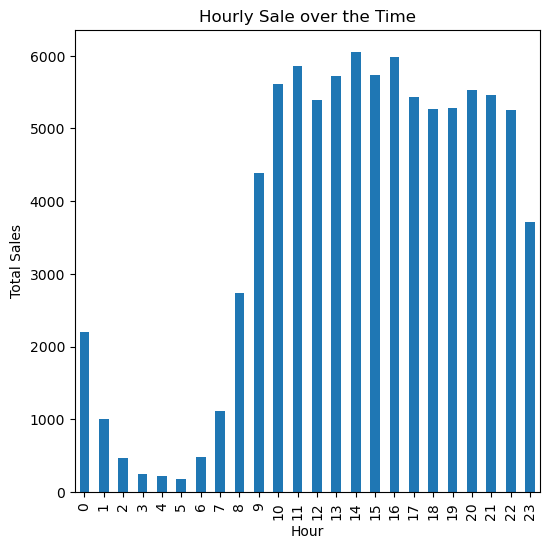

In [65]:
plt.figure(figsize=(6,6))
hour_wise_order_detailsdata.plot(kind="bar")
plt.title('Hourly Sale over the Time')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()
#peak hour is 2:00PM as number of sales are high at that time

In [69]:
#sales['day'] = sales['order_purchase_timestamp'].dt.day
#sales['week'] = sales['order_purchase_timestamp'].dt.isocalendar().week
#sales['month'] = sales['order_purchase_timestamp'].dt.month
#sales['year'] = sales['order_purchase_timestamp'].dt.year

<Axes: xlabel='hours'>

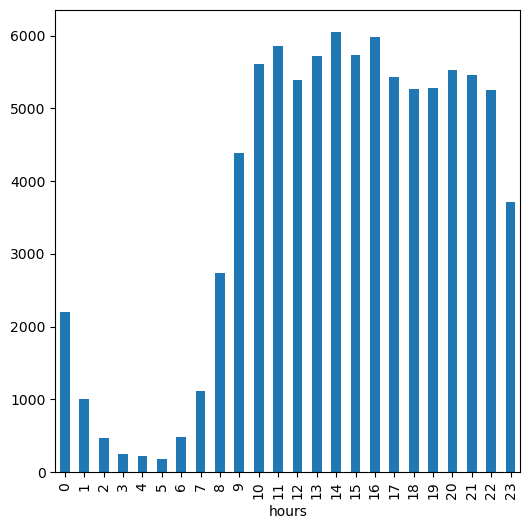

In [73]:
plt.figure(figsize=(6,6))
hour_wise_order_detailsdata.plot(kind="bar")
#order_purchase_timestamp

In [89]:
import holidays

In [75]:

# Extracting the year from 'order_purchase_timestamp' column
year_to_check = order_detailsdata['order_purchase_timestamp'].dt.year

# Convert the years to a list (holidays.Brazil expects a list or integer)
year_list = list(set(year_to_check))

# Fetch Brazil holidays for the years in year_list
Brazil_holidays = holidays.Brazil(years=year_list)

# Convert the holidays to a DataFrame
Holidays_df = pd.DataFrame(Brazil_holidays.items(), columns=['Date', 'Holiday']).reset_index(drop=True)

# Show the resulting DataFrame
print(Holidays_df)


          Date                     Holiday
0   2016-01-01  Confraternização Universal
1   2016-03-25           Sexta-feira Santa
2   2016-04-21                  Tiradentes
3   2016-05-01          Dia do Trabalhador
4   2016-09-07     Independência do Brasil
5   2016-10-12     Nossa Senhora Aparecida
6   2016-11-02                     Finados
7   2016-11-15    Proclamação da República
8   2016-12-25                       Natal
9   2017-01-01  Confraternização Universal
10  2017-04-14           Sexta-feira Santa
11  2017-04-21                  Tiradentes
12  2017-05-01          Dia do Trabalhador
13  2017-09-07     Independência do Brasil
14  2017-10-12     Nossa Senhora Aparecida
15  2017-11-02                     Finados
16  2017-11-15    Proclamação da República
17  2017-12-25                       Natal
18  2018-01-01  Confraternização Universal
19  2018-03-30           Sexta-feira Santa
20  2018-04-21                  Tiradentes
21  2018-05-01          Dia do Trabalhador
22  2018-09

In [76]:

Holidays_df['Date']=pd.to_datetime(Holidays_df['Date'])
Holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     27 non-null     datetime64[ns]
 1   Holiday  27 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 564.0+ bytes


In [77]:
#order_detailsdata['Holidays_category']=order_detailsdata.apply(lambda x: 'Holiday' if x['order_purchase_timestamp'] == Holidays_df['Date'] else 'Working_Day',axis=1)

Holidays_df['Date'] = pd.to_datetime(Holidays_df['Date'])

# Use 'isin()' to check if the 'order_purchase_timestamp' is in the list of holidays
order_detailsdata['Holidays_category'] = order_detailsdata.apply(
    lambda x: 'Holiday' if x['order_purchase_timestamp'].date() in Holidays_df['Date'].dt.date.values else 'Working_Day', 
    axis=1
)


In [78]:
holidays_values=order_detailsdata['Holidays_category'].value_counts().reset_index()
holidays_values

,Holidays_category,count
0,Working_Day,87940
1,Holiday,1376


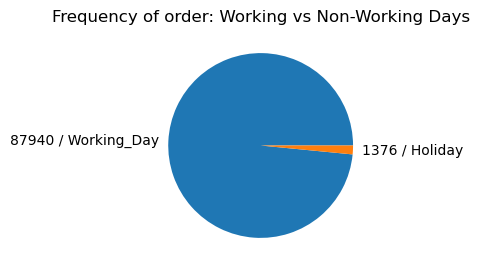

In [79]:

plt.figure(figsize=(3,3))
plt.pie(holidays_values['count'],labels=holidays_values['count'].astype(str) +" / "+ holidays_values['Holidays_category'])
plt.title('Frequency of order: Working vs Non-Working Days')
plt.show()

7. Customer Retention and Loyalty# data not adequate to find the answer

* What percentage of customers make repeat purchases?# data not adequate to find the answer
* How does the frequency of purchases correlate with the total amount spent?# data not adequate to find the answer

8. Product Category Performance

* Which product categories generate the most revenue?
* Are there any trends or shifts in product category popularity over time?

In [80]:
New_sales

,product_category_name,payment_value
0,art,587.542308
1,cine_photo,428.566000
2,fashion_childrens_clothes,367.645000
3,furniture_living_room,361.852195
4,costruction_tools_tools,342.603125
5,watches_gifts,335.571430
6,construction_tools_construction,329.481771
7,fashion_male_clothing,315.317143
8,computers,310.543585
9,garden_tools,309.863631


In [81]:
New_sales_product=New_sales_df.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False).reset_index().head(10)
New_sales_product

,product_category_name,payment_value
0,toys,17930485.54
1,health_beauty,585082.93
2,bed_bath_table,567676.95
3,sports_leisure,494226.86
4,furniture_decor,467145.03
5,computers_accessories,459540.19
6,watches_gifts,401343.43
7,housewares,374363.07
8,garden_tools,250059.95
9,telephony,240001.85


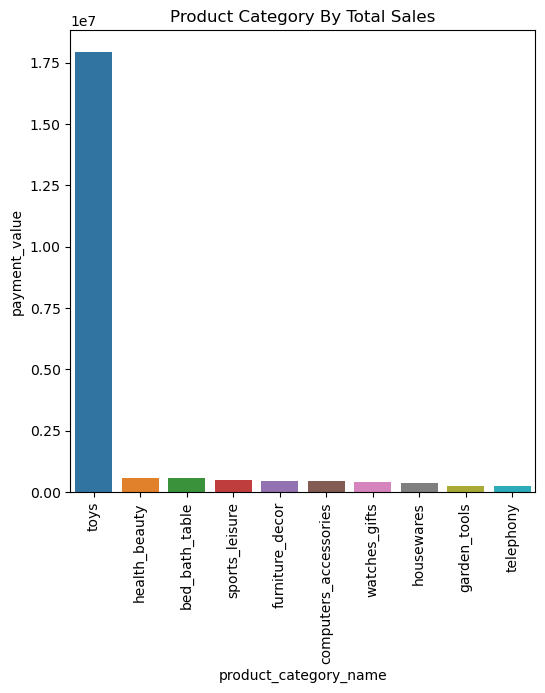

In [82]:
plt.figure(figsize=(6,6))
sns.barplot(x= 'product_category_name', y = 'payment_value', data = New_sales_product)
plt.xticks(rotation = 90)
plt.title("Product Category By Total Sales")
plt.show()

In [83]:
product_trend_year=New_sales_df.groupby(['product_category_name','year'])['payment_value'].sum().sort_values(ascending=False).reset_index().head(10)
product_trend_year

,product_category_name,year,payment_value
0,toys,2018,9613481.04
1,toys,2017,8266863.48
2,health_beauty,2018,338768.26
3,bed_bath_table,2018,296945.54
4,computers_accessories,2018,287210.11
5,watches_gifts,2018,276734.32
6,bed_bath_table,2017,267275.70
7,sports_leisure,2017,261640.95
8,health_beauty,2017,243552.22
9,furniture_decor,2017,238260.38


In [84]:
"""sns.barplot(x='year',y='payment_value',hue='product_category_name',data=product_trend_year)
plt.xticks(rotation=90)
plt.show()"""

"sns.barplot(x='year',y='payment_value',hue='product_category_name',data=product_trend_year)\nplt.xticks(rotation=90)\nplt.show()"

In [85]:
#product_trend_year.info()
data_2018=product_trend_year[product_trend_year['year']==2018]
data_2017=product_trend_year[product_trend_year['year']==2017]

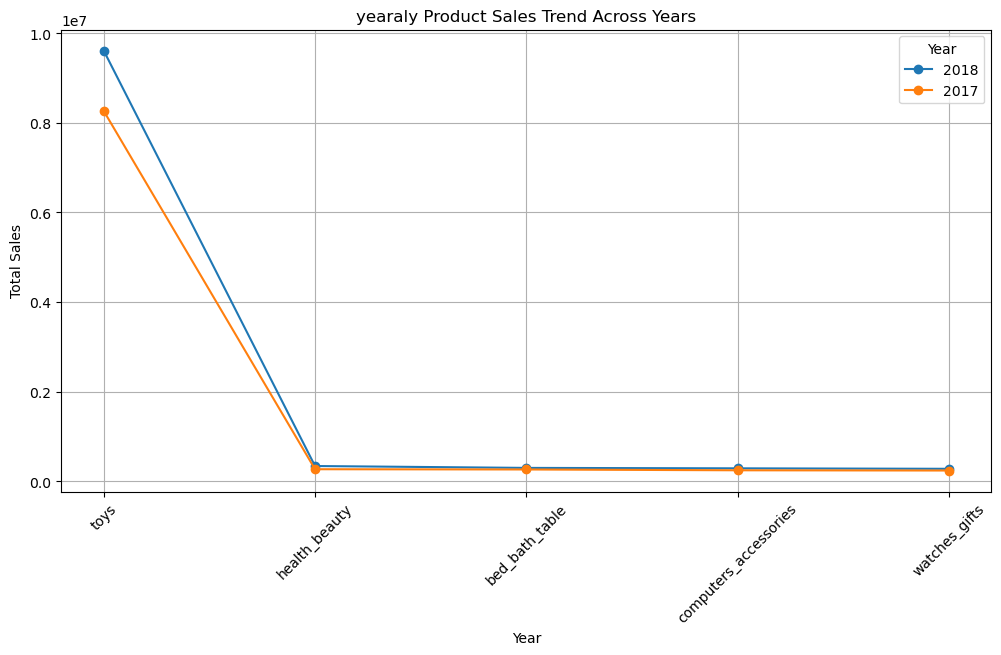

In [86]:

plt.figure(figsize=(12, 6))
plt.plot(data_2018['product_category_name'], data_2018['payment_value'], marker='o', label='2018')
plt.plot(data_2018['product_category_name'], data_2017['payment_value'], marker='o', label='2017')
plt.title('yearaly Product Sales Trend Across Years')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

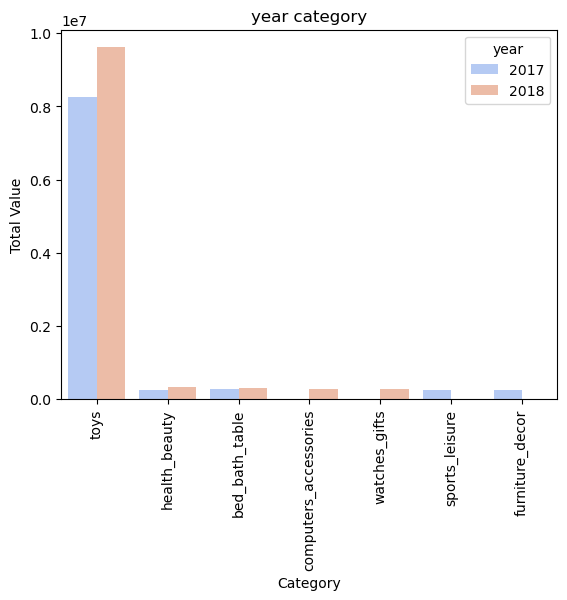

In [87]:
sns.barplot(x=product_trend_year['product_category_name'] ,hue=product_trend_year['year'], y=product_trend_year['payment_value'], data=product_trend_year, palette="coolwarm" )
plt.title('year category')
plt.ylabel('Total Value')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.show()

In [88]:
product_trend_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  10 non-null     object 
 1   year                   10 non-null     int32  
 2   payment_value          10 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 332.0+ bytes


9. Discounts and Promotions #Data not available

* How do discount codes or promotions impact sales volume and revenue?
* Are there specific types of discounts that are more effective in driving sales?
